In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report,accuracy_score,precision_score,
                             confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,roc_curve)

import warnings
warnings.simplefilter("ignore")

In [2]:
def wrangle(filepath):
    df=pd.read_csv(filepath)
   
    return df

In [3]:
df = wrangle(r'C:\Users\kelvin\OneDrive\Desktop\file1\credit_risk_dataset_training.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
4,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3


In [4]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              613
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2147
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
orde =OrdinalEncoder()
trans_one =orde.fit_transform(df)
df=pd.DataFrame(trans_one,columns=df.columns)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,2.0,1782.0,3.0,35.0,4.0,3.0,694.0,237.0,1.0,59.0,1.0,1.0
1,1.0,20.0,2.0,5.0,1.0,1.0,5.0,92.0,0.0,10.0,0.0,0.0
2,3.0,2021.0,3.0,4.0,3.0,2.0,694.0,215.0,1.0,53.0,0.0,0.0
3,1.0,23.0,2.0,2.0,5.0,0.0,55.0,15.0,1.0,25.0,0.0,0.0
4,6.0,2366.0,3.0,8.0,1.0,1.0,694.0,127.0,1.0,45.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22845,32.0,1998.0,3.0,4.0,4.0,3.0,594.0,225.0,1.0,31.0,1.0,17.0
22846,37.0,1519.0,0.0,1.0,4.0,2.0,179.0,149.0,0.0,11.0,0.0,28.0
22847,34.0,2999.0,0.0,4.0,4.0,0.0,545.0,21.0,0.0,15.0,0.0,17.0
22848,36.0,3148.0,0.0,5.0,4.0,1.0,488.0,100.0,0.0,10.0,0.0,24.0


In [6]:
s_impute=SimpleImputer(verbose=0,strategy="mean",missing_values=np.nan)
df1= s_impute.fit_transform(df)

In [7]:
df=pd.DataFrame(df1,columns=df.columns)
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [8]:
y = df["loan_status"]
X=df[[i for i in df.columns if "loan_status" not in  i]]

In [9]:
scaler=StandardScaler()
scaler_x=scaler.fit_transform(X)
scaler_x

array([[-0.92018752,  0.14633334,  0.92499424, ...,  3.94017427,
         2.15581844, -0.69158791],
       [-1.08143574, -1.79051618,  0.22681043, ..., -0.65931249,
        -0.46386096, -0.93846012],
       [-0.75893929,  0.40905016,  0.92499424, ...,  3.37697181,
        -0.46386096, -0.93846012],
       ...,
       [ 4.23975568,  1.48410057, -1.16955718, ..., -0.1899771 ,
        -0.46386096,  3.25836742],
       [ 4.56225213,  1.64788637, -1.16955718, ..., -0.65931249,
        -0.46386096,  4.98647288],
       [ 6.17473438, -0.66490102,  0.92499424, ..., -0.1899771 ,
        -0.46386096,  5.97396172]])

In [10]:
X_train,X_test,y_train,y_test=train_test_split(scaler_x,y,test_size=0.3,random_state=42)

In [11]:
model= LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [12]:
y_pre=model.predict(X_test)
y_pre
y_test=y_test.astype(int)

In [13]:
cm = confusion_matrix(y_test,y_pre)
cm

array([[5056,  259],
       [ 835,  705]], dtype=int64)

0.8525150578490184


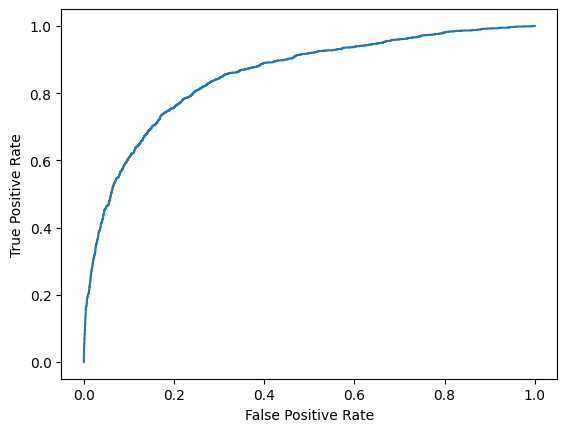

In [14]:
from sklearn import metrics
y_pred = model.predict_proba(X_test)[:,1]
y_pred = model.predict_proba(X_test)[::,1]
fpr, tpr,_= metrics.roc_curve(y_test,  y_pred)
score=roc_auc_score(y_test,y_pred)
print(score)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
print(classification_report(y_pre,y_test))

              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90      5891
         1.0       0.46      0.73      0.56       964

    accuracy                           0.84      6855
   macro avg       0.70      0.79      0.73      6855
weighted avg       0.88      0.84      0.85      6855

